In [13]:
import pandas as pd
import os

# Merge all the csv files

In [77]:


files = [file for file in os.listdir("./Sales_Data")]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months = pd.concat([all_months, df])
    
    
all_months.to_csv("all_months.csv", index = False)


#### Read the dataframe with all months data

In [92]:
all_data = pd.read_csv("all_months.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean the data

#### Drop the NaN values

In [126]:
all_data = all_data.dropna()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Find and delete the 'Or' values 

In [178]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert the colums into correct data type

In [174]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'].astype(int))

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'].astype(float))

type(all_data(Price Each))

SyntaxError: invalid syntax (<ipython-input-174-024274dc0558>, line 5)

## Data Profiling

#### Add a month column

In [162]:
all_data['Month'] = all_data['Order Date'].str[:2]


all_data['Month'] = all_data['Month'].astype('int32')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [206]:
del all_data['Sales in Millions']

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Q. Which was the best month for sales and how much was the sales?

In [208]:
results = all_data.groupby('Month').sum()

results

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3.623537e+06,3.644513e+06
2,26898,4.377769e+06,4.404045e+06
3,34010,5.582416e+06,5.614201e+06
4,41116,6.735342e+06,6.781340e+06
5,37334,6.270250e+06,6.305214e+06
6,30506,5.124051e+06,5.155605e+06
7,32144,5.265079e+06,5.295552e+06
8,26896,4.460691e+06,4.488936e+06
9,26218,4.169984e+06,4.195120e+06


<BarContainer object of 12 artists>

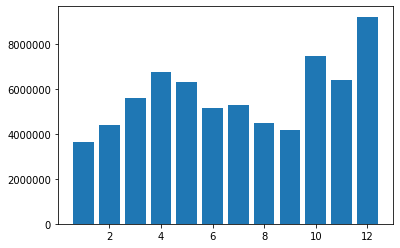

In [209]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])